In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import random
# Use Hongjin Zhu's N number
seed = 11993511
random.seed(seed)
np.random.seed(seed)

In [3]:
file_url = 'https://raw.githubusercontent.com/HongjinZhu/IDS-Capstone-Project/main/spotify52kData.csv'
df = pd.read_csv(file_url)
df

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve

In [4]:
feature_col = ['duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

y = df['popularity'].values

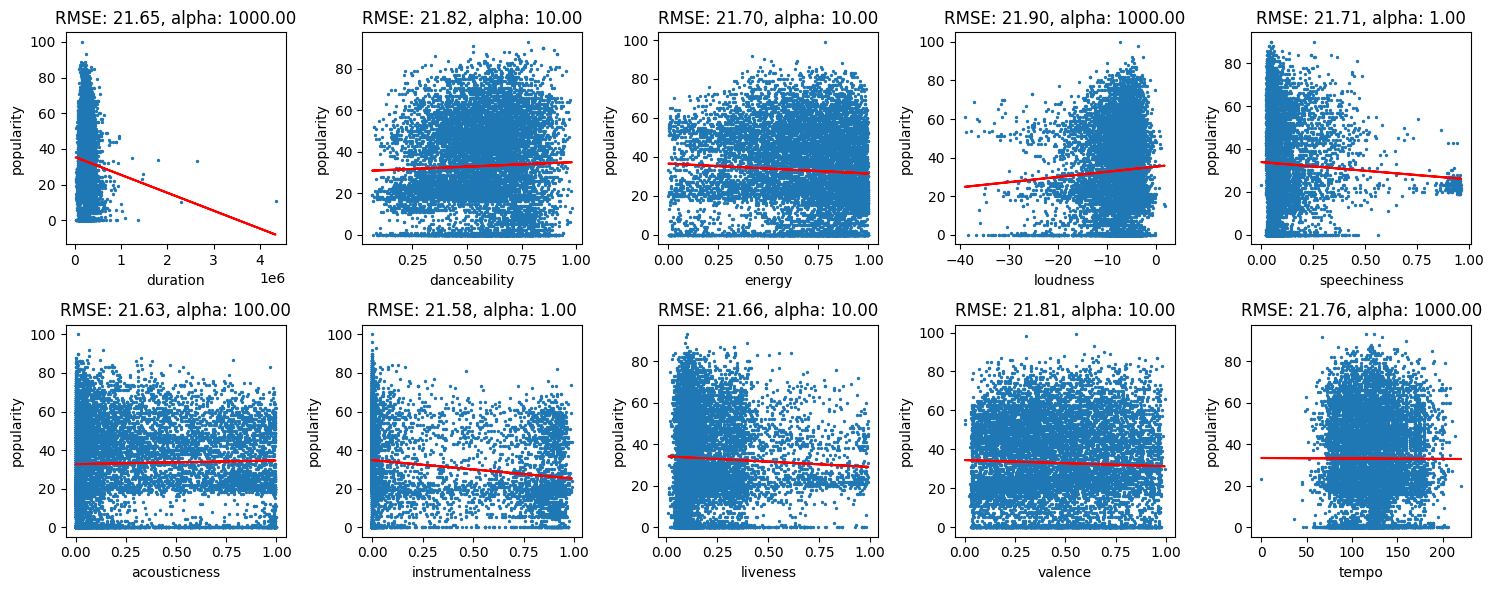

,feature,RMSE,coef,best hyper
0,duration,21.650107,-0.000010,1000
1,danceability,21.816927,4.446947,10
2,energy,21.701134,-5.085824,10
3,loudness,21.901795,0.268914,1000
4,speechiness,21.708888,-8.087407,1
5,acousticness,21.627899,1.902639,100
6,instrumentalness,21.578161,-9.645743,1
7,liveness,21.657736,-5.128994,10
8,valence,21.807269,-3.202630,10
9,tempo,21.755815,-0.002262,1000


In [8]:
RMSE = []
betas = []
alphas = []

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

for i, f in enumerate(feature_col):
  X = df[f].values.reshape(-1, 1)

  # train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # hyperparameter tuning
  param_grid = {'alpha': [1e-2, 1e-1, 1, 10, 100, 1000]}
  grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=10)
  grid_search.fit(X_train, y_train)
  best_alpha = grid_search.best_params_['alpha']
  best_model = grid_search.best_estimator_
  beta = best_model.coef_[0]

  # evaluate the model
  pred = best_model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred))

  RMSE.append(rmse)
  betas.append(beta)
  alphas.append(best_alpha)

  axes[i].scatter(X_test, y_test, s=2)
  axes[i].plot(X_test, pred, color='red')
  axes[i].set_title(f'RMSE: {rmse:.2f}, alpha: {best_alpha:.2f}')
  axes[i].set_xlabel(f'{f}')
  axes[i].set_ylabel('popularity')

plt.tight_layout()
plt.show()

# print results
results4 = pd.DataFrame({'feature': feature_col, 'RMSE': RMSE, 'coef': betas, 'best hyper': alphas})
results4

In [10]:
X = df[feature_col].values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# hyperparameter tuning
param_grid = {'alpha': [1e-2, 1e-1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_
beta = best_model.coef_

# evaluate the model
pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# print results
print(f'RMSE: {rmse}, best hyper: {best_alpha}')
results5 = pd.DataFrame({'feature': feature_col, 'coef': betas})
results5

RMSE: 21.147773363362443, best hyper: 10


,feature,coef
0,duration,-0.000010
1,danceability,4.446947
2,energy,-5.085824
3,loudness,0.268914
4,speechiness,-8.087407
5,acousticness,1.902639
6,instrumentalness,-9.645743
7,liveness,-5.128994
8,valence,-3.202630
9,tempo,-0.002262


In [ ]:
# without regularization
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# print results
print(f'RMSE: {rmse}')
results6 = pd.DataFrame({'feature': feature_col, 'coef': betas})
results6

RMSE: 21.32831582514701


,feature,coef
0,duration,-0.000010
1,danceability,4.430581
2,energy,-4.771806
3,loudness,0.273277
4,speechiness,-8.180358
5,acousticness,1.853596
6,instrumentalness,-9.732396
7,liveness,-5.307113
8,valence,-2.925948
9,tempo,-0.001070


In [ ]:
# assign X and y
X = df['valence'].values.reshape(-1, 1)
y = df['mode'].values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

{'C': 0.001}


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


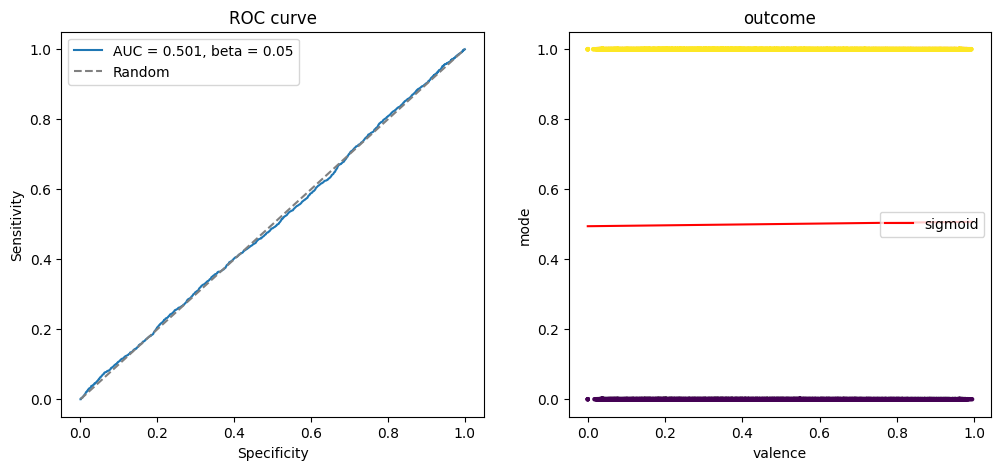

In [ ]:
# logistic regression
model = LogisticRegression(class_weight='balanced')

# hyperparameter tuning
param_grid = {'C':  [1e-3, 1e-2, 1e-1, 1, 10, 100]}
grid_search_log = GridSearchCV(estimator = model, param_grid = param_grid, scoring="accuracy")
grid_search_log.fit(X_train, y_train)
best_params = grid_search_log.best_params_
print(best_params)

# test using best model
best_model_log = grid_search_log.best_estimator_
y_pred = best_model_log.predict_proba(X_test)[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
# report betas
betas = best_model_log.coef_[0][0]

# separate subplots for each movie
fig, (roc_ax, decision_boundary_ax) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot ROC curve
fp, tp, _ = roc_curve(y_test, y_pred)
roc_ax.plot(fp, tp, label=f'AUC = {auc:.3f}, beta = {betas:.2f}')
roc_ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
roc_ax.set_xlabel('Specificity')
roc_ax.set_ylabel('Sensitivity')
roc_ax.set_title(f'ROC curve')
roc_ax.legend()

# plot outcome
decision_boundary_ax.scatter(X, y, s=5, c=y, marker='o')
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_values = 1 / (1 + np.exp(-(best_model_log.coef_[0][0] * x_values + best_model_log.intercept_[0])))
decision_boundary_ax.plot(x_values, y_values, color='red', label='sigmoid')

decision_boundary_ax.set_xlabel('valence')
decision_boundary_ax.set_ylabel('mode')
decision_boundary_ax.set_title(f'outcome')
decision_boundary_ax.legend()

plt.show()

In [ ]:
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear']}

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# hyperparameter tuning using grid search
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters:", best_params_svm)

# use model to make predictions and assess accuracy of model
best_svm_pred = grid_search_svm.predict(X_test)

# assess model accuracy by comparing predictions with reality
acc_best_svm = accuracy_score(y_test, best_svm_pred)
print(f'Best SVM model accuracy: {acc_best_svm:.3f}')

Best Hyperparameters: {'C': 0.001}
Best SVM model accuracy: 0.616


Best SVM model AUC: 0.5008


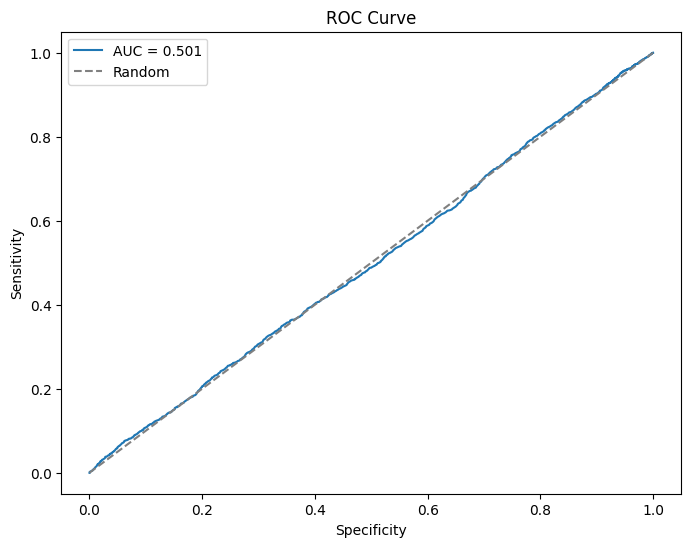

In [ ]:
# assess model by AUC
svm_model = SVC(kernel='linear', C=0.001, probability=True)
svm_model.fit(X_train, y_train)
best_svm_probs = svm_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, best_svm_probs)
print(f'Best SVM model AUC: {auc:.4f}')

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_svm_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [5]:
from scipy.stats import chi2_contingency

mean_valence = df['valence'].mean()
df['valence_group'] = df['valence'].apply(lambda x: 1 if x >= mean_valence else 0)

# contingency table
contingency_table = pd.crosstab(df['valence_group'], df['mode'])

# chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"p-value: {p}")

contingency_table

Chi-square value: 9.69582880863528e-07
p-value: 0.9992143439471286


mode,0,1
valence_group,,
0,10290,16996
1,9319,15395


We can predict whether a song is in major or minor key from valence using logistic regression or a support vector machine, but the results are not good.
After performing a Chi-square test we find that there is no significant difference between the mode of the songs with high and low valence.

Best decision tree AUC: 0.559


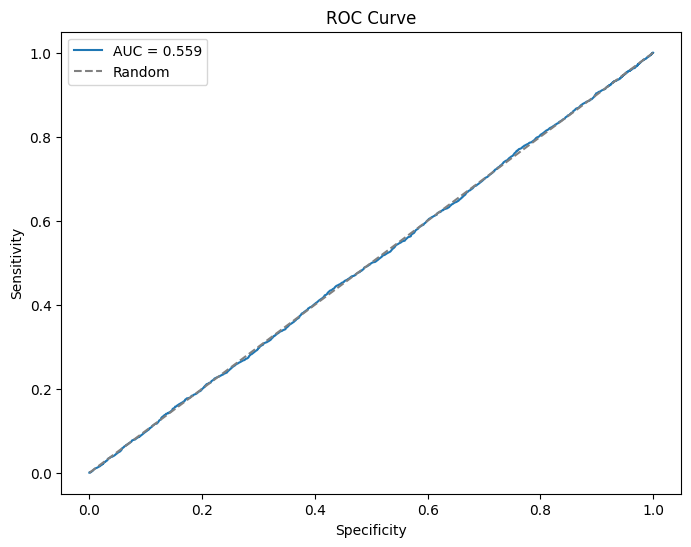

In [ ]:
# try decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f'Best decision tree AUC: {auc:.3f}')

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_svm_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()